Nathan Saric - 04/27/2021

In [1]:
# Importing packages necessary for data modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
# Reading dataset file into the environment
movies = pd.read_csv('imdb_top_1000.csv')
# Removing columns that will not be used in the model
movies = movies.drop(columns = ['Poster_Link', 'Series_Title', 'Released_Year', 'Overview', 'No_of_Votes'])

# Removing all rows with null values
movies.dropna(inplace = True) 

# Inspecting the modified dataset
print(movies.dtypes)
print(str(movies))
print(movies.columns)

# Removing 'min' string from the Runtime column
movies['Runtime'] = movies['Runtime'].str.replace("min", "")

# Removing commas from the Gross column
movies["Gross"] = movies["Gross"].str.replace(",", "")

# Transforming the relevant columns to integer data types
movies['Runtime'] = movies['Runtime'].astype(int)
movies['IMDB_Rating'] = movies['IMDB_Rating'].astype(int)
movies['Meta_score'] = movies['Meta_score'].astype(int)
movies['Gross'] = movies['Gross'].astype(int)

# Standardizing the string values for relevant columns
movies["Genre"] = movies["Genre"].str.replace(" ", "")
movies["Genre"] = movies["Genre"].str.lower()
movies["Director"] = movies["Director"].str.lower()
movies["Star1"] = movies["Star1"].str.lower()
movies["Star2"] = movies["Star2"].str.lower()
movies["Star3"] = movies["Star3"].str.lower()
movies["Star4"] = movies["Star4"].str.lower()

# Inspecting the modified dataset 
display(movies)
print(movies.dtypes)

Certificate     object
Runtime         object
Genre           object
IMDB_Rating    float64
Meta_score     float64
Director        object
Star1           object
Star2           object
Star3           object
Star4           object
Gross           object
dtype: object
    Certificate  Runtime                         Genre  IMDB_Rating  \
0             A  142 min                         Drama          9.3   
1             A  175 min                  Crime, Drama          9.2   
2            UA  152 min          Action, Crime, Drama          9.0   
3             A  202 min                  Crime, Drama          9.0   
4             U   96 min                  Crime, Drama          9.0   
..          ...      ...                           ...          ...   
990          PG  157 min           Drama, War, Western          7.6   
991          GP  144 min        Adventure, Comedy, War          7.6   
992           U   78 min  Animation, Adventure, Family          7.6   
994           U   87 mi

,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,Gross
0,A,142,drama,9,80,frank darabont,tim robbins,morgan freeman,bob gunton,william sadler,28341469
1,A,175,"crime,drama",9,100,francis ford coppola,marlon brando,al pacino,james caan,diane keaton,134966411
2,UA,152,"action,crime,drama",9,84,christopher nolan,christian bale,heath ledger,aaron eckhart,michael caine,534858444
3,A,202,"crime,drama",9,90,francis ford coppola,al pacino,robert de niro,robert duvall,diane keaton,57300000
4,U,96,"crime,drama",9,96,sidney lumet,henry fonda,lee j. cobb,martin balsam,john fiedler,4360000
...,...,...,...,...,...,...,...,...,...,...,...
990,PG,157,"drama,war,western",7,77,sergio leone,rod steiger,james coburn,romolo valli,maria monti,696690
991,GP,144,"adventure,comedy,war",7,50,brian g. hutton,clint eastwood,telly savalas,don rickles,carroll o'connor,1378435
992,U,78,"animation,adventure,family",7,65,wolfgang reitherman,phil harris,sebastian cabot,louis prima,bruce reitherman,141843612
994,U,87,"comedy,music,musical",7,96,richard lester,john lennon,paul mccartney,george harrison,ringo starr,13780024


Certificate    object
Runtime         int64
Genre          object
IMDB_Rating     int64
Meta_score      int64
Director       object
Star1          object
Star2          object
Star3          object
Star4          object
Gross           int64
dtype: object


<AxesSubplot:ylabel='Frequency'>

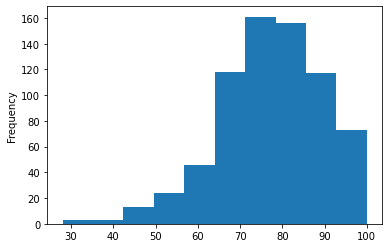

In [3]:
# Plotting a histogram for the Meta_score column
movies['Meta_score'].plot.hist()

In [4]:
# Transforming the Meta_score column into a categorical data type
outcome = []

for value in movies["Meta_score"]:
    if value >= 81:
        # 1 is success (Meta_score greater than or equal to 81)
        outcome.append(1)
    else:
        # 0 is flop (Meta_score less than 81)
        outcome.append(0)
movies["Outcome"] = outcome

# Inspecting the modified dataset 
display(movies)
print(movies.dtypes)

,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,Gross,Outcome
0,A,142,drama,9,80,frank darabont,tim robbins,morgan freeman,bob gunton,william sadler,28341469,0
1,A,175,"crime,drama",9,100,francis ford coppola,marlon brando,al pacino,james caan,diane keaton,134966411,1
2,UA,152,"action,crime,drama",9,84,christopher nolan,christian bale,heath ledger,aaron eckhart,michael caine,534858444,1
3,A,202,"crime,drama",9,90,francis ford coppola,al pacino,robert de niro,robert duvall,diane keaton,57300000,1
4,U,96,"crime,drama",9,96,sidney lumet,henry fonda,lee j. cobb,martin balsam,john fiedler,4360000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
990,PG,157,"drama,war,western",7,77,sergio leone,rod steiger,james coburn,romolo valli,maria monti,696690,0
991,GP,144,"adventure,comedy,war",7,50,brian g. hutton,clint eastwood,telly savalas,don rickles,carroll o'connor,1378435,0
992,U,78,"animation,adventure,family",7,65,wolfgang reitherman,phil harris,sebastian cabot,louis prima,bruce reitherman,141843612,0
994,U,87,"comedy,music,musical",7,96,richard lester,john lennon,paul mccartney,george harrison,ringo starr,13780024,1


Certificate    object
Runtime         int64
Genre          object
IMDB_Rating     int64
Meta_score      int64
Director       object
Star1          object
Star2          object
Star3          object
Star4          object
Gross           int64
Outcome         int64
dtype: object


In [5]:
# Transforming the relevant columns into dummy variables
movies_genre = movies['Genre'].str.get_dummies(sep=',')
movies_cert = movies['Certificate'].str.get_dummies(sep=',')
movies_dir = movies['Director'].str.get_dummies(sep=',')
movies_s1 = movies['Star1'].str.get_dummies(sep=',')
movies_s2 = movies['Star2'].str.get_dummies(sep=',')
movies_s3 = movies['Star3'].str.get_dummies(sep=',')
movies_s4 = movies['Star4'].str.get_dummies(sep=',')

# Concatenating the relevant columnns into a new dataframe
movies_dv = pd.concat([movies, movies_genre, movies_cert, movies_dir, movies_s1, movies_s2, movies_s3, movies_s4], axis=1)
movies_dv = movies_dv.drop(columns = ['Genre', 'Certificate', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'Meta_score'])

# Inspecting the new dataset
display(movies_dv)
print(movies_dv.dtypes)
list(movies_dv.columns)

,Runtime,IMDB_Rating,Gross,Outcome,action,adventure,animation,biography,comedy,crime,...,xolani mali,yukiko shimazaki,yun qu,yvonne furneaux,zac mattoon o'brien,zach grenier,ziyi zhang,zoe saldana,zoë kravitz,álvaro guerrero
0,142,9,28341469,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,175,9,134966411,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,152,9,534858444,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,202,9,57300000,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,96,9,4360000,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,157,7,696690,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
991,144,7,1378435,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
992,78,7,141843612,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
994,87,7,13780024,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Runtime            int64
IMDB_Rating        int64
Gross              int64
Outcome            int64
action             int64
                   ...  
zach grenier       int64
ziyi zhang         int64
zoe saldana        int64
zoë kravitz        int64
álvaro guerrero    int64
Length: 2807, dtype: object


['Runtime',
 'IMDB_Rating',
 'Gross',
 'Outcome',
 'action',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'romance',
 'sci-fi',
 'sport',
 'thriller',
 'war',
 'western',
 'A',
 'Approved',
 'G',
 'GP',
 'PG',
 'PG-13',
 'Passed',
 'R',
 'TV-PG',
 'U',
 'U/A',
 'UA',
 'abdellatif kechiche',
 'abhishek kapoor',
 'adam mckay',
 'akira kurosawa',
 'alan j. pakula',
 'alan parker',
 'alejandro amenábar',
 'alejandro g. iñárritu',
 'alejandro jodorowsky',
 'alex garland',
 'alex proyas',
 'alexander payne',
 'alfonso cuarón',
 'alfonso gomez-rejon',
 'alfred hitchcock',
 'anders thomas jensen',
 'andrew adamson',
 'andrew davis',
 'andrew lau',
 'andrew niccol',
 'andrew stanton',
 'andrey zvyagintsev',
 'aneesh chaganty',
 'ang lee',
 'anthony russo',
 'antoine fuqua',
 'anton corbijn',
 'asghar farhadi',
 'ashutosh gowariker',
 'barry levinson',
 'ben affleck',
 'benn

In [6]:
# Splitting the dataset into features and target vectors
y_movies = movies_dv.loc[:, ['Outcome']]
X_movies = movies_dv.drop(columns=['Outcome'])

In [7]:
# Splitting the dataset into a testing set and a training set
X_train, X_test, y_train, y_test = train_test_split(X_movies, y_movies, test_size=0.2, random_state=12345)

In [8]:
# Random Forest Classifier
# Note: n_estimators is the number of trees
RF=RandomForestClassifier(n_estimators=200).fit(X_train,y_train)
y_pred=RF.predict(X_test)

# Displaying the accuracy score for Random Forest Classifier
accuracy_score(y_test, y_pred)

<ipython-input-8-9bcf38cc3d98>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF=RandomForestClassifier(n_estimators=200).fit(X_train,y_train)


0.5874125874125874

In [9]:
# Displaying the feature importance for the model
feature_imp = pd.Series(RF.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp.head(10)

Runtime             0.027239
Gross               0.025753
IMDB_Rating         0.013026
animation           0.007671
crime               0.007435
romance             0.006540
alfonso cuarón      0.005626
alfred hitchcock    0.005606
UA                  0.005183
action              0.004514
dtype: float64

In [10]:
# Displaying the resulting confusion matrix 
with np.printoptions(threshold=np.inf):
    print(confusion_matrix(y_test, y_pred))

[[77  2]
 [57  7]]


In [11]:
# Splitting the dataset into a testing set and a training set
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_movies, y_movies, test_size=0.2,random_state=12345)

In [12]:
# Computing the mean absolute percentage error 
def compute_mape_score(y_test2_input, y_pred_input):
    y_test2_input = np.array(y_test2_input).reshape(-1,)
    y_pred_input = np.array(y_pred_input).reshape(-1,)
    percent_errors = np.abs((y_test2_input - y_pred_input) / y_test2_input) * 100
    return np.mean(np.array(percent_errors))

SCORING_CONFIG = {'mape' : compute_mape_score}

In [13]:
# Lasso
# Note: Numpy transformations are done for compatibility with method signature
lasso = Lasso().fit(X_train2, y_train2)
y_pred_lasso = lasso.predict(X_test2)

# Computing the MAPE score for the Lasso model
print("Lasso MAPE = ", compute_mape_score(y_test2, y_pred_lasso))

Lasso MAPE =  inf


<ipython-input-12-1d6a7a0f3329>:5: RuntimeWarning: divide by zero encountered in true_divide
  percent_errors = np.abs((y_test2_input - y_pred_input) / y_test2_input) * 100


In [14]:
# Displaying the coefficients for the Lasso model
x = lasso.coef_
with np.printoptions(threshold=np.inf):
    print(x)

[-0.0000000e+00  0.0000000e+00 -1.2906715e-10 -0.0000000e+00
  0.0000000e+00  0.0000000e+00 -0.0000000e+00  0.0000000e+00
 -0.0000000e+00  0.0000000e+00 -0.0000000e+00 -0.0000000e+00
  0.0000000e+00 -0.0000000e+00  0.0000000e+00  0.0000000e+00
 -0.0000000e+00 -0.0000000e+00  0.0000000e+00 -0.0000000e+00
 -0.0000000e+00 -0.0000000e+00  0.0000000e+00  0.0000000e+00
 -0.0000000e+00  0.0000000e+00  0.0000000e+00 -0.0000000e+00
  0.0000000e+00 -0.0000000e+00  0.0000000e+00 -0.0000000e+00
  0.0000000e+00  0.0000000e+00 -0.0000000e+00 -0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00 -0.0000000e+00 -0.0000000e+00 -0.0000000e+00
 -0.0000000e+00 -0.0000000e+00 -0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00 -0.0000000e+00
  0.0000000e+00  0.0000000e+00 -0.0000000e+00 -0.0000000e+00
  0.0000000e+00  0.0000000e+00 -0.0000000e+00  0.0000000e+00
 -0.0000000e+00 -0.0000000e+00 -0.0000000e+00  0.0000000e+00
  0.0000000e+00 -0.00000

In [15]:
# Creating a set of alpha values to check from
ALPHAS = list(0.1+x/10 for x in range(10))

# Initializing the cross-validation with 5 folds and fitting the model 
lasso_cv = LassoCV(alphas=ALPHAS, max_iter=1e7, tol=1e-2, cv=5)
lasso_cv.fit(np.array(X_train2), np.array(y_train2).reshape(-1,))

# Using the model to make predictions
y_pred_lasso = lasso_cv.predict(X_test2)
y_pred_lasso[y_pred_lasso < 0] = 0

# Computing the MAPE score for the LassoCV model
print("LassoCV MAPE = ", compute_mape_score(y_test2, y_pred_lasso))

LassoCV MAPE =  inf


<ipython-input-12-1d6a7a0f3329>:5: RuntimeWarning: divide by zero encountered in true_divide
  percent_errors = np.abs((y_test2_input - y_pred_input) / y_test2_input) * 100


In [16]:
# Displaying the coefficients for the Lasso model
x = lasso_cv.coef_
with np.printoptions(threshold=np.inf):
    print(x)

[-0.00000000e+00  0.00000000e+00 -1.29067193e-10 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000

0.4

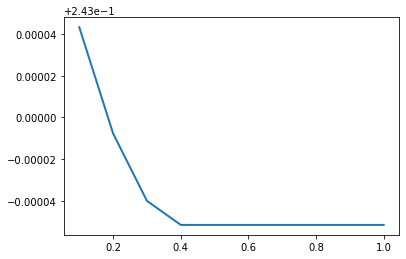

In [17]:
# Plotting a graph for the LassoCV model
plt.plot(lasso_cv.alphas_ , lasso_cv.mse_path_.mean(axis=-1), linewidth=2)

lasso_cv.alpha_

In [18]:
# Splitting the dataset into a testing set and a training set
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_movies, y_movies, test_size=0.1,random_state=12345) 

In [19]:
# Logistic Regression
model = LogisticRegression(max_iter=10000)
model.fit(X_train3, np.ravel(y_train3, order='C'))

# Displaying the feature importance for the model
feature_importance=pd.DataFrame({'feature':list(X_train3.columns),
                                 'feature_importance':[abs(i) for i in model.coef_[0]]})
feature_importance.sort_values('feature_importance', ascending=False)

,feature,feature_importance
2,Gross,1.599405e-09
0,Runtime,8.408539e-15
1,IMDB_Rating,4.443628e-16
9,drama,4.961893e-17
8,crime,3.660154e-17
...,...,...
1885,maria doyle kennedy,0.000000e+00
1887,mariel hemingway,0.000000e+00
2541,lyubov agapova,0.000000e+00
1892,martin balsam,0.000000e+00


In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Creating an ROC plot
def roc_plot(actual, probability, model_name):
    """
    Inputs: 
    - actual values of y_test (1 dimensional array)
    - probability estimate of y_test (1 dimensional array)
    - name of the classifier (string)
    
    Output: ROC plot with AUC
    """
    fpr, tpr, _ = roc_curve(actual, probability)
    
    plt.title(model_name+'Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc(fpr, tpr))
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    return plt.show()

# Creating a Lift plot
def lift_plot(actual, probability, model_name):
    """
    Inputs: 
    - actual values of y_test (1 dimensional array)
    - probability estimate of y_test (1 dimensional array)
    - name of the classifier (string)
    
    Output: Cummulative Gain Chart and Lift Curve
    """
    fpr, tpr, thresholds = roc_curve(actual, probability)
    ppr=(tpr*actual.sum()+fpr*(actual.count()-actual.sum()))/actual.count()
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(ppr, tpr, label='')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.grid(b=True, which='both', color='0.65',linestyle='-')
    plt.xlabel('%Population')
    plt.ylabel('%Target')
    plt.title(model_name+'Cumulative Gains Chart')
    plt.legend(loc="lower right")

    plt.subplot(1,2,2)
    plt.plot(ppr, tpr/ppr, label='')
    plt.plot([0, 1], [1, 1], 'k--')
    plt.grid(b=True, which='both', color='0.65',linestyle='-')
    plt.xlabel('%Population')
    plt.ylabel('Lift')
    plt.title(model_name+'Lift Curve')

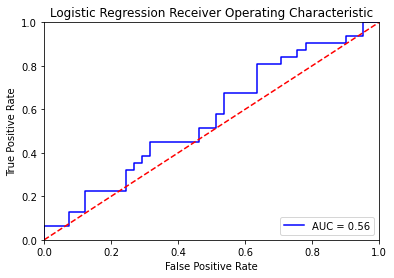

In [21]:
# Plotting an ROC curve for Logistic Regression model
probslog = model.predict_proba(X_test3)
predslog = probslog[:,1]

roc_plot(y_test3, predslog, "Logistic Regression ")

No handles with labels found to put in legend.
<ipython-input-20-1d573411b96a>:51: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(ppr, tpr/ppr, label='')


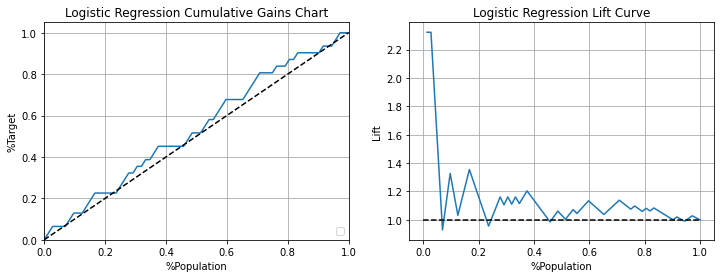

In [22]:
# Plotting a Lift Curve for Logistic Regression model
y_test3 = y_test3['Outcome']
lift_plot(y_test3, predslog, "Logistic Regression ")

In [23]:
# Decision Tree
# Splitting the dataset into features and target vectors
y_movies = movies_dv.loc[:, ['Outcome']]
X_movies = movies_dv.drop(columns=['Outcome'])

# Splitting the dataset into a testing set and a training set
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_movies, y_movies, test_size=0.1,random_state=12345) 

tree_fit = DecisionTreeClassifier(max_depth=6).fit(X_train4, y_train4)

y_pred4 =tree_fit.predict(X_test4)

display(accuracy_score(y_test4, y_pred4))

0.6666666666666666

In [24]:
tree_fit = DecisionTreeClassifier(max_depth=6).fit(X_train4, y_train4)

# Using the model to make predictions
y_pred4 =tree_fit.predict(X_test4)

# Displaying the accuracy score for Random Forest Classifier
display(accuracy_score(y_test4, y_pred4))

0.6527777777777778

In [25]:
# Displaying the resulting confusion matrix 
with np.printoptions(threshold=np.inf):
    print(confusion_matrix(y_test4, y_pred4))

[[33  8]
 [17 14]]


[Text(169.4925, 201.90857142857143, 'X[1] <= 7.5\ngini = 0.486\nsamples = 642\nvalue = [374, 268]'),
 Text(89.9775, 170.84571428571428, 'X[48] <= 0.5\ngini = 0.458\nsamples = 369\nvalue = [238, 131]'),
 Text(81.60750000000002, 139.78285714285715, 'X[18] <= 0.5\ngini = 0.453\nsamples = 364\nvalue = [238, 126]'),
 Text(41.85000000000001, 108.72, 'X[5] <= 0.5\ngini = 0.435\nsamples = 316\nvalue = [215, 101]'),
 Text(25.110000000000003, 77.65714285714284, 'X[50] <= 0.5\ngini = 0.42\nsamples = 287\nvalue = [201, 86]'),
 Text(16.740000000000002, 46.59428571428572, 'X[774] <= 0.5\ngini = 0.416\nsamples = 285\nvalue = [201, 84]'),
 Text(8.370000000000001, 15.531428571428563, 'gini = 0.412\nsamples = 283\nvalue = [201, 82]'),
 Text(25.110000000000003, 15.531428571428563, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(33.480000000000004, 46.59428571428572, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(58.59, 77.65714285714284, 'X[35] <= 0.5\ngini = 0.499\nsamples = 29\nvalue = [14, 15]'),

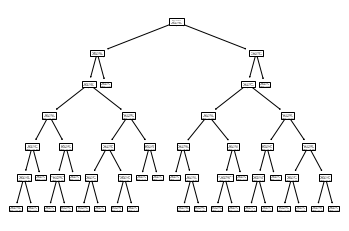

In [26]:
# Plotting the resulting decision tree
tree.plot_tree(tree_fit)